# Mean Filter


In [11]:
import SimpleITK as sitk, importlib.metadata, sys, subprocess

try:
    print("SimpleITK version →", importlib.metadata.version("SimpleITK"))
except importlib.metadata.PackageNotFoundError:
    print("SimpleITK not in this env")

# If version < 2.3, upgrade; it takes ~30 s and avoids AttributeErrors
# (Skip this line if you already see 2.3.x or newer)
# subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "SimpleITK", "--no-cache-dir"])


SimpleITK version → 2.4.1


# Checkerboard_Implementation(1_a_1,1_a_2,1_a_3,1_a_4)

In [ ]:
# # =====================================================
#  IBSI 1.a.2  –  3-D mean filter (M=15) with NEAREST
# =====================================================
IMG_PATH = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii"

RULE    = "mirror"      # padding
OUT_TAG = "1_a_4"        # output ID tag

from pathlib import Path
import SimpleITK as sitk

KERNEL_M = 15
RADIUS   = (KERNEL_M - 1) // 2          # 7 voxels

img      = sitk.ReadImage(IMG_PATH)
pad_vec  = [RADIUS] * img.GetDimension()

# ---------- PAD step (nearest = ZeroFluxNeumannPad) -----
padded   = sitk.ZeroFluxNeumannPad(img, pad_vec, pad_vec)

# ---------- MEAN filter ---------------------------------
flt      = sitk.BoxMeanImageFilter()
flt.SetRadius(RADIUS)                   # SimpleITK 2.x
filtered = flt.Execute(padded)

# ---------- SAVE ----------------------------------------
out_dir  = Path(IMG_PATH).parent / "ibsi_single_outputs"
out_dir.mkdir(exist_ok=True)
out_path = out_dir / f"{OUT_TAG}_mean15.nii.gz"
sitk.WriteImage(filtered, str(out_path))

print("✓ saved →", out_path)



✓ saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\ibsi_single_outputs\1_a_4_mean15.nii.gz


# Impulse_Implementtation(1_b_1)

In [20]:
# # =====================================================
#  IBSI 1.a.2  –  3-D mean filter (M=15) with NEAREST
# =====================================================
IMG_PATH = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\impulse\image\impulse.nii\impulse.nii"

RULE    = "zero"      # padding
OUT_TAG = "1.b.1"        # output ID tag

from pathlib import Path
import SimpleITK as sitk

KERNEL_M = 15
RADIUS   = (KERNEL_M - 1) // 2          # 7 voxels

img      = sitk.ReadImage(IMG_PATH)
pad_vec  = [RADIUS] * img.GetDimension()

# ---------- PAD step (nearest = ZeroFluxNeumannPad) -----
padded   = sitk.ZeroFluxNeumannPad(img, pad_vec, pad_vec)

# ---------- MEAN filter ---------------------------------
flt      = sitk.BoxMeanImageFilter()
flt.SetRadius(RADIUS)                   # SimpleITK 2.x
filtered = flt.Execute(padded)

# ---------- SAVE ----------------------------------------
out_dir  = Path(IMG_PATH).parent / "ibsi_single_outputs"
out_dir.mkdir(exist_ok=True)
out_path = out_dir / f"{OUT_TAG}_mean15.nii.gz"
sitk.WriteImage(filtered, str(out_path))

print("✓ saved →", out_path)

✓ saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\impulse\image\impulse.nii\ibsi_single_outputs\1.b.1_mean15.nii.gz


# LoG Filter

# Impulse Implementation(2.a)

In [22]:
# --- 2.a LoG, impulse phantom, zero padding -------------------------
IMG_PATH = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\impulse\image\impulse.nii\impulse.nii"   
SIGMA_MM = 3.0
OUT_TAG  = "2_a_log"                        # output file name root

from pathlib import Path
import SimpleITK as sitk
import numpy as np


img      = sitk.ReadImage(IMG_PATH)
spacing  = np.array(img.GetSpacing())       # mm
sigma_vox= SIGMA_MM / spacing               # one per axis
radius   = np.ceil(4 * sigma_vox).astype(int).tolist()

# zero padding (constant 0)
padded   = sitk.ConstantPad(img, radius, radius, 0)

# Laplacian-of-Gaussian
log_filt = sitk.LaplacianRecursiveGaussianImageFilter()
log_filt.SetSigma(SIGMA_MM)
filtered = log_filt.Execute(padded)

out_path = Path(IMG_PATH).with_name(f"{OUT_TAG}.nii.gz")
sitk.WriteImage(filtered, str(out_path))
print("✓ 2.a saved →", out_path)


✓ 2.a saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\impulse\image\impulse.nii\2_a_log.nii.gz


# Checkerboard Implementation (2.b,2.c)

In [ ]:
#3d Implementation
# --- 2.a LoG, impulse phantom, zero padding -------------------------
IMG_PATH = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii"   # <- change to your impulse file
SIGMA_MM = 3.0
OUT_TAG  = "2_b_log"                        # output file name root

from pathlib import Path
import SimpleITK as sitk
import numpy as np

img      = sitk.ReadImage(IMG_PATH)
spacing  = np.array(img.GetSpacing())       # mm
sigma_vox= SIGMA_MM / spacing               # one per axis
radius   = np.ceil(4 * sigma_vox).astype(int).tolist()

# zero padding (constant 0)
padded   = sitk.ConstantPad(img, radius, radius, 0)

# Laplacian-of-Gaussian
log_filt = sitk.LaplacianRecursiveGaussianImageFilter()
log_filt.SetSigma(SIGMA_MM)
filtered = log_filt.Execute(padded)

out_path = Path(IMG_PATH).with_name(f"{OUT_TAG}.nii.gz")
sitk.WriteImage(filtered, str(out_path))
print("✓ 2.a saved →", out_path)


✓ 2.a saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\2_b_log.nii.gz


In [31]:
# ===============================================================
#  IBSI 2.c  –  2-D LoG (σ′ = 5 mm)   mirror padding, slice loop
# ===============================================================

IMG_PATH = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii"
SIGMA_MM = 5.0
OUT_TAG  = "2_c_log"

from pathlib import Path
import SimpleITK as sitk
import numpy as np

# --- load & compute in-plane radius ---------------------------------
img       = sitk.ReadImage(IMG_PATH)
spacing   = np.array(img.GetSpacing())          # [sx, sy, sz]  mm
radius_xy = int(np.ceil(4 * SIGMA_MM / spacing[0]))  # assume isotropic x–y
pad_vec   = [radius_xy, radius_xy, 0]           # mirror pad only in x,y

# --- mirror padding --------------------------------------------------
padded    = sitk.MirrorPad(img, pad_vec, pad_vec)

# --- set up 2-D Laplacian-of-Gaussian -------------------------------
log2d = sitk.LaplacianRecursiveGaussianImageFilter()
log2d.SetSigma(SIGMA_MM)        # scalar = 2-D kernel on each slice

# --- process each axial slice ---------------------------------------
slices = []
for z in range(padded.GetSize()[2]):
    slice_2d = padded[:, :, z]          # extract 2-D slice
    slices.append(log2d.Execute(slice_2d))

filtered = sitk.JoinSeries(slices)      # stack back to 3-D
filtered.CopyInformation(padded)        # keep origin / spacing

# --- save ------------------------------------------------------------
out_path = Path(IMG_PATH).with_name(f"{OUT_TAG}.nii.gz")
sitk.WriteImage(filtered, str(out_path))
print("✓ saved →", out_path)





✓ saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\2_c_log.nii.gz


# Laws Filter

In [ ]:
import SimpleITK as sitk
import numpy as np
import itertools
from pathlib import Path

# ─── 0. CONFIGURE FOR ONE IBSI LAWS CASE ────────────────────────
ID_TAG     = "3_c_3"    # e.g. "3_c_1", "3_c_2", or "3_c_3"
IMG_PATH   = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii"   # <- change to your impulse file
TRIPLET    = "E3W5R5"     # 2-D Laws kernel for 3.c.x
PADDING    = "mirror"   # mirror padding
DO_MAXPOOL = True      # True for 3_c_2 and 3_c_3
ENERGY_R   = 7          # 0 for resp, 7 for energy (3_c_3)
# ────────────────────────────────────────────────────────────────

# 1-D Laws vectors (include E3 if you ever use it)
base = {
    "L5": np.array([ 1,  4,  6,  4, 1], np.float32),
    "E5": np.array([-1, -2,  0,  2, 1], np.float32),
    "S5": np.array([-1,  0,  2,  0, -1], np.float32),
    "W5": np.array([-1,  2,  0, -2,  1], np.float32),
    "R5": np.array([ 1, -4,  6, -4,  1], np.float32),
    "E3": np.array([-1,  0,  1],       np.float32),
}

def outer3(a, b, c):
    return np.outer(np.outer(a, b).reshape(a.size, b.size), c).reshape(a.size, b.size, c.size)

# Build 2- or 3-D kernels
tokens = [TRIPLET[i:i+2] for i in range(0, len(TRIPLET), 2)]
perms  = list(itertools.permutations(tokens)) if DO_MAXPOOL else [tuple(tokens)]

kernels = []
for p in perms:
    if len(p) == 3:
        k_np = outer3(base[p[0]], base[p[1]], base[p[2]])      # shape 5×5×5
    else:
        # 2-D case: outer2, then add singleton z-axis
        k2   = np.outer(base[p[0]], base[p[1]])              # shape 5×5
        k_np = k2[:, :, None]                                 # shape 5×5×1
    kernels.append(k_np)

# Load and pad image
img   = sitk.Cast(sitk.ReadImage(IMG_PATH), sitk.sitkFloat32)
pad_r = [2, 2, 2]  # half-kernel of max dimension
padded = (sitk.ConstantPad(img, pad_r, pad_r, 0)
          if PADDING == "zero"
          else sitk.MirrorPad(img, pad_r, pad_r))

# Convolve & combine
def make_kernel(k_np):
    k = sitk.GetImageFromArray(k_np[::-1, ::-1, ::-1])
    k = sitk.Cast(k, sitk.sitkFloat32)
    k.SetSpacing(padded.GetSpacing())
    return k

resp = None
for k_np in kernels:
    out = sitk.Abs(sitk.Convolution(padded, make_kernel(k_np)))
    resp = out if resp is None else sitk.Maximum(resp, out)

# Optional energy map
if ENERGY_R > 0:
    resp = sitk.Sqrt(sitk.BoxMean(resp * resp, [ENERGY_R]*3))

# Save single output
out_dir = Path(IMG_PATH).parent / "laws_single_outputs"
out_dir.mkdir(exist_ok=True)
suffix  = "energy" if ENERGY_R > 0 else "resp"
out_fn  = f"{ID_TAG}_{TRIPLET.lower()}_{suffix}.nii.gz"
sitk.WriteImage(resp, str(out_dir / out_fn))

print(f"✓ {ID_TAG} saved → {out_dir / out_fn}")


✓ 3_c_3 saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\laws_single_outputs\3_c_3_l5s5_energy.nii.gz


# Gabor

✓ 4_b_1 → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\sphere\image\sphere.nii\gabor_single_outputs\4_b_1_gabor.nii.gz


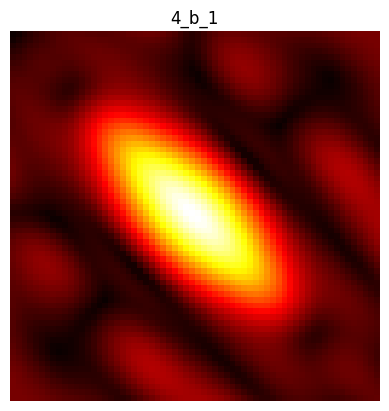

In [60]:
import nibabel as nib
import numpy as np
import torch
import torch.nn.functional as F
from pathlib import Path
import matplotlib.pyplot as plt

# ─── 0. CONFIGURE FOR ONE IBSI GABOR CASE ───────────────────────
ID_TAG   = "4_b_1"   # "4_a_1", "4_a_2", "4_b_1" or "4_b_2"
IMG_PATH = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\sphere\image\sphere.nii\sphere.nii"  # path to your .nii
SIGMA    = 20.0    # σ* in mm
LAMBDA   =  8.0    # λ* in mm
GAMMA    =  2.5    # spatial aspect ratio
THETA0  = 5 * np.pi/4  # start
ΔTHETA  = np.pi/8
PADDING  = "mirror"  # "zero" for 4.a.*, "mirror" for 4.b.*
# ────────────────────────────────────────────────────────────────

# 1. LOAD VOLUME
nii      = nib.load(IMG_PATH)
vol      = nii.get_fdata().astype(np.float32)  # shape = (Z, Y, X)
affine   = nii.affine
zoom     = np.array(nii.header.get_zooms()[:2])  # assume 2D isotropic in‐plane

# 2. BUILD 2D GABOR KERNEL
sigma_px  = SIGMA / zoom[0]                # pixels
lambda_px = LAMBDA / zoom[0]
# kernel half‐size = 3σ (you can adjust to 4σ for larger support)
radius    = int(np.ceil(3 * sigma_px))
size      = 2 * radius + 1

# meshgrid in pixel units
x = np.arange(-radius, radius+1)
y = x.copy()
X, Y = np.meshgrid(x, y)

# rotate coords
Xr =  X * np.cos(THETA) + Y * np.sin(THETA)
Yr = -X * np.sin(THETA) + Y * np.cos(THETA)

# real & imag parts
gauss = np.exp(-(Xr**2 + (GAMMA**2)*(Yr**2)) / (2*sigma_px**2))
real  = gauss * np.cos(2*np.pi * Xr / lambda_px)
imag  = gauss * np.sin(2*np.pi * Xr / lambda_px)

# to torch kernels
kern_r = torch.from_numpy(real[np.newaxis, np.newaxis, ...]).float()
kern_i = torch.from_numpy(imag[np.newaxis, np.newaxis, ...]).float()

# 3. PREPARE TENSOR & PADDING
pad = radius
vol_t = torch.from_numpy(vol).unsqueeze(0).unsqueeze(0)  # (1,1,Z,Y,X)

# define pad mode for F.pad
pad_mode = {"zero":"constant","mirror":"reflect"}[PADDING]

# we'll apply per‐slice 2D conv → loop over Z
out = torch.zeros_like(vol_t)

for z in range(vol_t.shape[2]):
    sl = vol_t[0,0,z,:,:].unsqueeze(0).unsqueeze(0)
    sl = F.pad(sl, (pad,pad,pad,pad), mode=pad_mode, value=0)
    r = F.conv2d(sl, kern_r)
    i = F.conv2d(sl, kern_i)
    mag = torch.sqrt(r**2 + i**2)
    out[0,0,z] = mag.squeeze()

# 4. SAVE & OPTIONAL DISPLAY
out_np = out.squeeze().cpu().numpy()
out_nii = nib.Nifti1Image(out_np, affine)
out_dir = Path(IMG_PATH).parent / "gabor_single_outputs"
out_dir.mkdir(exist_ok=True)
out_fn  = f"{ID_TAG}_gabor.nii.gz"
nib.save(out_nii, out_dir / out_fn)
print(f"✓ {ID_TAG} → {out_dir/out_fn}")

# bonus: show middle slice
mid = vol.shape[0]//2
plt.imshow(out_np[mid], cmap="hot"); plt.title(ID_TAG); plt.axis("off")
plt.show()


# Daubechies 2

In [66]:
import pywt
import nibabel as nib
import numpy as np
from pathlib import Path

# ════════════════════════════════════════════════════════
#                         CONFIG
# ════════════════════════════════════════════════════════
CONFIG = {
    "IMG_PATH"          : r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\impulse\image\impulse.nii\impulse.nii",
    "ID_TAG"            : "5_a_1",   # "5_a_1" or "5_a_2"
    "WAVELET"           : "db2",     # Daubechies-2
    "LEVEL"             : 1,         # first level
    "SUBBAND"           : "ada",     # 'ada' = LHL
    "ROTATION_INVARIANT": False      # False → 5.a.1, True → 5.a.2
}
# ════════════════════════════════════════════════════════

# 1. Load volume
nii   = nib.load(CONFIG["IMG_PATH"])
data  = nii.get_fdata().astype(np.float32)
aff   = nii.affine

# 2. Undecimated (stationary) 3-D wavelet, no mode arg here
coeffs = pywt.swtn(
    data,
    wavelet=CONFIG["WAVELET"],
    level=CONFIG["LEVEL"],
    axes=(0,1,2)
)[0]

# 3. Extract or average subbands
if not CONFIG["ROTATION_INVARIANT"]:
    # single‐subband response map (LHL = 'ada')
    resp = coeffs[CONFIG["SUBBAND"]]
else:
    # average of the three single-high-pass subbands:
    # HLL='daa', LHL='ada', LLH='aad'
    resp = (
        coeffs["daa"]
      + coeffs["ada"]
      + coeffs["aad"]
    ) / 3.0

# 4. Save result
out_dir = Path(CONFIG["IMG_PATH"]).parent / "udwt_single_outputs"
out_dir.mkdir(exist_ok=True)
suffix = "ri" if CONFIG["ROTATION_INVARIANT"] else "resp"
out_fn = f"{CONFIG['ID_TAG']}_{CONFIG['WAVELET']}_{CONFIG['SUBBAND']}_{suffix}.nii.gz"
out_path = out_dir / out_fn

nib.save(nib.Nifti1Image(resp, aff), str(out_path))
print(f"✓ {CONFIG['ID_TAG']} saved → {out_path}")



✓ 5_a_1 saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\impulse\image\impulse.nii\udwt_single_outputs\5_a_1_db2_ada_resp.nii.gz


# Coiflet 1

In [69]:
import pywt
import nibabel as nib
import numpy as np
from pathlib import Path

# ════════════════════════════════════════════════════════
#                        CONFIGURATION
# ════════════════════════════════════════════════════════
CONFIG = {
    "IMG_PATH"          : r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\sphere\image\sphere.nii\sphere.nii",
    "ID_TAG"            : "6_a_2",     # "6_a_1" or "6_a_2"
    "WAVELET"           : "coif1",     # Coiflet-1
    "LEVEL"             : 1,           # decomposition level
    "SUBBAND"           : "dda",       # HHL = 'dda'
    "ROTATION_INVARIANT": True        # False → 6.a.1, True → 6.a.2
}
# ════════════════════════════════════════════════════════

# 1. Load the sphere phantom
nii   = nib.load(CONFIG["IMG_PATH"])
data  = nii.get_fdata().astype(np.float32)
aff   = nii.affine

# 2. Stationary 3-D wavelet (periodic padding)
coeffs = pywt.swtn(
    data,
    wavelet=CONFIG["WAVELET"],
    level=CONFIG["LEVEL"],
    axes=(0,1,2)
)[0]  # level-1 coefficients

# 3. Extract or average subbands
if not CONFIG["ROTATION_INVARIANT"]:
    # 6.a.1: just the HHL subband
    resp = coeffs[CONFIG["SUBBAND"]]
else:
    # 6.a.2: average the three HHL permutations: dda, dad, add
    resp = (coeffs["dda"] + coeffs["dad"] + coeffs["add"]) / 3.0

# 4. Save the result
out_dir = Path(CONFIG["IMG_PATH"]).parent / "udwt_single_outputs"
out_dir.mkdir(exist_ok=True)
suffix  = "ri" if CONFIG["ROTATION_INVARIANT"] else "resp"
out_fn  = f"{CONFIG['ID_TAG']}_{CONFIG['WAVELET']}_{CONFIG['SUBBAND']}_{suffix}.nii.gz"
out_p   = out_dir / out_fn

nib.save(nib.Nifti1Image(resp, aff), str(out_p))
print(f"✓ {CONFIG['ID_TAG']} saved → {out_p}")



✓ 6_a_2 saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\sphere\image\sphere.nii\udwt_single_outputs\6_a_2_coif1_dda_ri.nii.gz


# Haar

In [70]:
import pywt
import nibabel as nib
import numpy as np
import itertools
from pathlib import Path

# ════════════════════════════════════════════════════════
#                            CONFIG
# ════════════════════════════════════════════════════════
CONFIG = {
    "IMG_PATH"         : r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii",
    "ID_TAG"           : "7_a_1",   # "7_a_1" or "7_a_2"
    "WAVELET"          : "haar",    # Haar wavelet
    "LEVEL"            : 2,         # second‐level coefficients
    "SUBBAND"          : "aaa",     # "aaa"=LLL for 7.a.1, "ddd"=HHH for 7.a.2
    "DO_MAXPOOL"       : True      # False for 7.a.1, True for 7.a.2
}
# ════════════════════════════════════════════════════════

# 1. Load the checkerboard volume
nii   = nib.load(CONFIG["IMG_PATH"])
data  = nii.get_fdata().astype(np.float32)
aff   = nii.affine

# 2. Undecimated 3-D wavelet transform (stationary; uses periodic padding)
coeffs_list = pywt.swtn(data,
                       wavelet=CONFIG["WAVELET"],
                       level=CONFIG["LEVEL"],
                       axes=(0,1,2))
# pick the second‐level dict (index 1, since Python is 0-based)
coeffs = coeffs_list[CONFIG["LEVEL"] - 1]

# 3. Extract or average subbands for rotation invariance
if not CONFIG["DO_MAXPOOL"]:
    # single‐subband map
    resp = coeffs[CONFIG["SUBBAND"]]
else:
    # rotation‐invariant: average all permutations of the letters
    toks   = list(CONFIG["SUBBAND"])
    perms  = set(itertools.permutations(toks))
    maps   = [coeffs[''.join(p)] for p in perms]
    resp   = sum(maps) / len(maps)

# 4. Save the result
out_dir = Path(CONFIG["IMG_PATH"]).parent / "udwt_single_outputs"
out_dir.mkdir(exist_ok=True)
suffix  = "ri" if CONFIG["DO_MAXPOOL"] else "resp"
out_fn  = f"{CONFIG['ID_TAG']}_{CONFIG['WAVELET']}_{CONFIG['SUBBAND']}_{suffix}.nii.gz"
out_p   = out_dir / out_fn

nib.save(nib.Nifti1Image(resp, aff), str(out_p))
print(f"✓ {CONFIG['ID_TAG']} saved → {out_p}")


✓ 7_a_1 saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\udwt_single_outputs\7_a_1_haar_aaa_ri.nii.gz


# Simoncelli

In [73]:
import SimpleITK as sitk
from pathlib import Path
import numpy as np

# ===========================================================================
#                                CONFIGURE
# ===========================================================================
# 1) Full path to your checkerboard .nii
IMG_PATH    = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii"

# 2) Which band‐pass level? 1, 2 or 3
LEVEL       = 3   # → 8.a.1; use 2 for 8.a.2; 3 for 8.a.3

# 3) Define the octave‐scale sigmas (in mm).  
#    For level L we subtract blur at sigma[L] from sigma[L+1].
#    Here’s a typical 1-2-4-8 mm progression:
SIGMA_OCTAVE = [1.0, 2.0, 4.0, 8.0]  

# 4) Padding rule
PADDING     = "periodic"   # Simoncelli always uses periodic

# 5) Output tag (for filename)
ID_TAG      = f"8_a_{LEVEL}"
# ===========================================================================

# --- load image ---
img       = sitk.ReadImage(IMG_PATH)
spacing   = np.array(img.GetSpacing())[:3]   # mm/voxel (assumed isotropic)
    
# --- pad periodically by a safe margin (4× highest sigma in mm → in voxels) ---
max_sigma = SIGMA_OCTAVE[-1]
pad_vox   = int(np.ceil(4 * (max_sigma / spacing[0])))
padded    = sitk.WrapPad(img, [pad_vox]*3, [pad_vox]*3)

# --- compute band-pass: B_L = G(σ_L) − G(σ_{L+1}) ---
σ_lo = SIGMA_OCTAVE[LEVEL-1]
σ_hi = SIGMA_OCTAVE[LEVEL]

# Gaussian smoothing (3D)
blur_lo = sitk.SmoothingRecursiveGaussian(padded, σ_lo)
blur_hi = sitk.SmoothingRecursiveGaussian(padded, σ_hi)

bmap    = sitk.Subtract(blur_lo, blur_hi)

# --- crop back to original size (remove pad) ---
origin      = padded.GetOrigin()
size_full   = padded.GetSize()
start_index = [pad_vox]*3
end_size    = [size_full[i] - 2*pad_vox for i in range(3)]
bmap_crop   = sitk.Crop(bmap, start_index, start_index)

# --- save result ---
out_dir = Path(IMG_PATH).parent / "udwt_single_outputs"
out_dir.mkdir(exist_ok=True)
out_fn  = f"{ID_TAG}_bmap.nii.gz"
sitk.WriteImage(bmap_crop, str(out_dir / out_fn))

print(f"✓ saved → {out_dir/out_fn}")


✓ saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\udwt_single_outputs\8_a_3_bmap.nii.gz


# Riesz-transformed LoG

In [82]:
import numpy as np
import SimpleITK as sitk
from pathlib import Path

# ══════════════ CONFIG ══════════════
IMG_PATH = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\sphere\image\sphere.nii\sphere.nii" 
ID_TAG   = "9_b_2"     # "9_a_1", "9_b_1", or "9_b_2"
SIGMA    = 3.0         # σ = 3 mm
CUTOFF   = 4           # support = 4·σ
L        = (0, 2, 0)   # (ℓₓ,ℓᵧ,ℓ_z) = (1,0,0) for 9.a.1; (0,2,0) for 9.b.1/9.b.2
# ═════════════════════════════════════

# 1) Read & zero-pad
img      = sitk.ReadImage(IMG_PATH)
spacing  = np.array(img.GetSpacing())
sigma_v  = SIGMA / spacing
rad_v    = np.ceil(CUTOFF * sigma_v).astype(int).tolist()
padded   = sitk.ConstantPad(img, rad_v, rad_v, 0)

# 2) 3-D LoG
logf     = sitk.LaplacianRecursiveGaussianImageFilter()
logf.SetSigma(SIGMA)
log_img  = logf.Execute(padded)
arr      = sitk.GetArrayFromImage(log_img)  # (Z,Y,X)

# 3) FFT-based Riesz transform of order L
Z,Y,X = arr.shape
kx = np.fft.fftfreq(X, d=spacing[0])
ky = np.fft.fftfreq(Y, d=spacing[1])
kz = np.fft.fftfreq(Z, d=spacing[2])
KX,KY,KZ = np.meshgrid(kx, ky, kz, indexing='xy')
K2 = KX**2 + KY**2 + KZ**2
K2[K2==0] = 1
R = (KX/np.sqrt(K2))**L[0] * (KY/np.sqrt(K2))**L[1] * (KZ/np.sqrt(K2))**L[2]

F     = np.fft.fftn(arr)
riesz = np.real(np.fft.ifftn(F * R))

# 4) Back to SITK & crop padding off
rimg = sitk.GetImageFromArray(riesz)
rimg = sitk.Cast(rimg, log_img.GetPixelID())
rimg.SetSpacing(log_img.GetSpacing())
rimg.SetOrigin (log_img.GetOrigin ())
crop = {0:rad_v[2], 1:rad_v[1], 2:rad_v[0]}
r_crop = sitk.Crop(rimg, crop, crop)

# 5) Save
out_path = Path(IMG_PATH).with_name(f"{ID_TAG}_rieszLoG.nii.gz")
sitk.WriteImage(r_crop, str(out_path))
print(f"✓ saved → {out_path}")


✓ saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\sphere\image\sphere.nii\9_b_2_rieszLoG.nii.gz


# Riesz-transformed Simoncelli

In [89]:
import numpy as np
import SimpleITK as sitk
from pathlib import Path

# ════════════════ CONFIG ════════════════
IMG_PATH     = r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\impulse\image\impulse.nii\impulse.nii"
ID_TAG       = "10_b_2"        # "10_a", "10_b_1", or "10_b_2"
SIGMA_OCTAVE = [1.0, 2.0, 4.0]  # mm
LEVEL        = 1               # first octave
PADDING      = "nearest"       # "zero" or "nearest"
L            = (0, 2, 0)       # Riesz order vector
USE_ST       = True            # True only for 10.b.2
SIGMA_T      = 1.0             # σ for structure tensor (mm)
# ════════════════════════════════════════

# 1) Load & pad for Simoncelli B-map
img     = sitk.ReadImage(IMG_PATH)
spacing = np.array(img.GetSpacing())[:3]
maxσ    = SIGMA_OCTAVE[-1]
pad     = int(np.ceil(4 * (maxσ / spacing[0])))

if PADDING == "zero":
    padded = sitk.ConstantPad(img, [pad]*3, [pad]*3, 0)
else:
    padded = sitk.ZeroFluxNeumannPad(img, [pad]*3, [pad]*3)

# 2) Simoncelli band‐pass: G(σ_lo) – G(σ_hi)
σ_lo = SIGMA_OCTAVE[LEVEL-1]
σ_hi = SIGMA_OCTAVE[LEVEL]

f_lo = sitk.SmoothingRecursiveGaussianImageFilter()
f_lo.SetSigma(σ_lo)
blur_lo = f_lo.Execute(padded)

f_hi = sitk.SmoothingRecursiveGaussianImageFilter()
f_hi.SetSigma(σ_hi)
blur_hi = f_hi.Execute(padded)

bmap = sitk.Subtract(blur_lo, blur_hi)
bmap = sitk.Crop(bmap, [pad]*3, [pad]*3)

# 3) Global structure‐tensor alignment (for 10.b.2)
if USE_ST:
    gradf = sitk.GradientRecursiveGaussianImageFilter()
    gradf.SetSigma(SIGMA_T)
    gv = gradf.Execute(bmap)
    Ix = sitk.VectorIndexSelectionCast(gv, 0)
    Iy = sitk.VectorIndexSelectionCast(gv, 1)
    Iz = sitk.VectorIndexSelectionCast(gv, 2)
    def smooth(img):
        sf = sitk.SmoothingRecursiveGaussianImageFilter()
        sf.SetSigma(SIGMA_T)
        return sf.Execute(img)
    Jxx = smooth(Ix*Ix); Jyy = smooth(Iy*Iy); Jzz = smooth(Iz*Iz)
    Jxy = smooth(Ix*Iy); Jxz = smooth(Ix*Iz); Jyz = smooth(Iy*Iz)
    size = bmap.GetSize()
    idx  = [s//2 for s in size]
    def v(img): return img.GetPixel(*idx)
    J = np.array([[v(Jxx), v(Jxy), v(Jxz)],
                  [v(Jxy), v(Jyy), v(Jyz)],
                  [v(Jxz), v(Jyz), v(Jzz)]], np.float64)
    w, v = np.linalg.eigh(J)
    U = v[:, np.argmax(w)]  # principal axis
else:
    U = None

# 4) FFT-based Riesz transform
arr = sitk.GetArrayFromImage(bmap)  # (Z,Y,X)
Z, Y, X = arr.shape
kx = np.fft.fftfreq(X, d=spacing[0])
ky = np.fft.fftfreq(Y, d=spacing[1])
kz = np.fft.fftfreq(Z, d=spacing[2])
KX, KY, KZ = np.meshgrid(kx, ky, kz, indexing="xy")
K2 = KX**2 + KY**2 + KZ**2
K2[K2 == 0] = 1

if USE_ST:
    KU = (KX*U[0] + KY*U[1] + KZ*U[2]) / np.sqrt(K2)
    R = KU**(abs(L[0]) + abs(L[1]) + abs(L[2]))
else:
    R = (KX/np.sqrt(K2))**L[0] \
      * (KY/np.sqrt(K2))**L[1] \
      * (KZ/np.sqrt(K2))**L[2]

Farr = np.fft.fftn(arr)
riesz = np.real(np.fft.ifftn(Farr * R))

# 5) Back to SITK & save
rimg = sitk.GetImageFromArray(riesz)
rimg = sitk.Cast(rimg, bmap.GetPixelID())
rimg.SetSpacing(bmap.GetSpacing())
rimg.SetOrigin(bmap.GetOrigin())

out_dir = Path(IMG_PATH).parent / "riesz_single_outputs"
out_dir.mkdir(exist_ok=True)
out_fn  = f"{ID_TAG}_simoncelli_bmap_lvl{LEVEL}.nii.gz"
sitk.WriteImage(rimg, str(out_dir / out_fn))

print("✓ saved →", out_dir / out_fn)


✓ saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\impulse\image\impulse.nii\riesz_single_outputs\10_b_2_simoncelli_bmap_lvl1.nii.gz
